In [ ]:
pip install catboost lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.4 MB/s eta 0:00:00


In [ ]:
#Imports
import random
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics, tree
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


#Task 1

Quadratics with all real roots: 31573 (78.93%)
Quadratics with complex roots: 8427 (21.07%)

Training SVM with RBF kernel...
Training completed in 2.34 seconds
Accuracy: 0.9971

Classification Report:
                precision    recall  f1-score   support

 Complex Roots       1.00      0.99      0.99      2576
All Real Roots       1.00      1.00      1.00      9424

      accuracy                           1.00     12000
     macro avg       1.00      0.99      1.00     12000
  weighted avg       1.00      1.00      1.00     12000

Confusion Matrix:
[[2552   24]
 [  11 9413]]


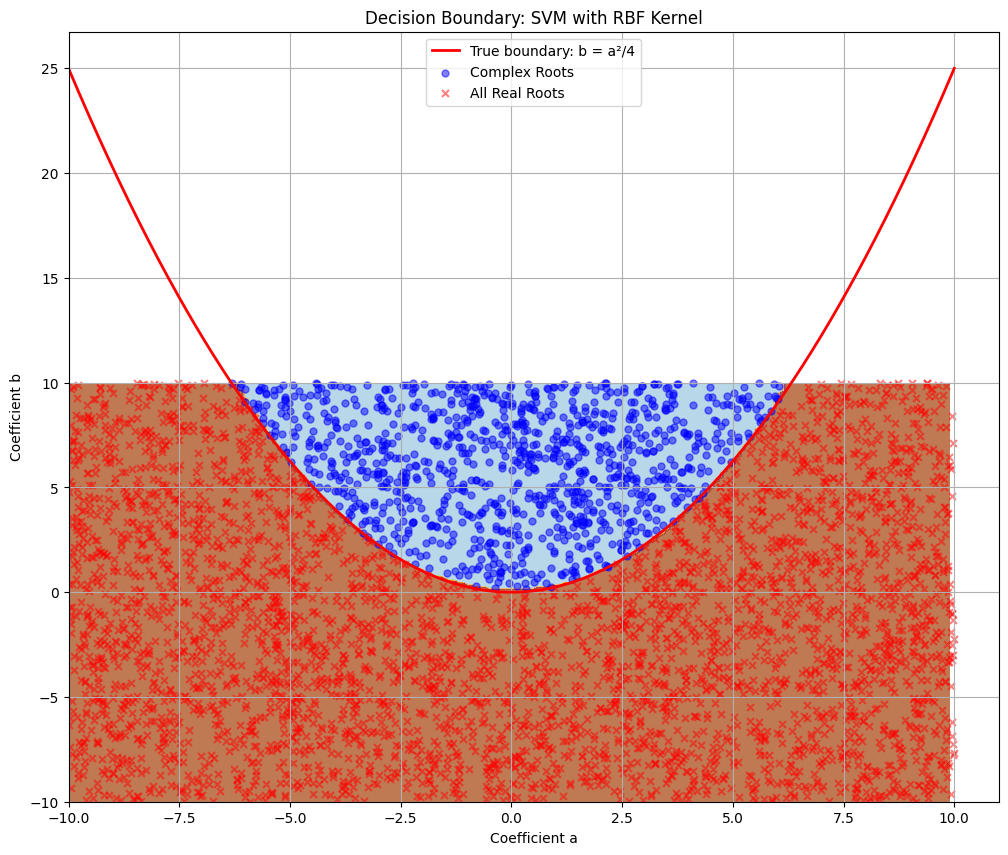

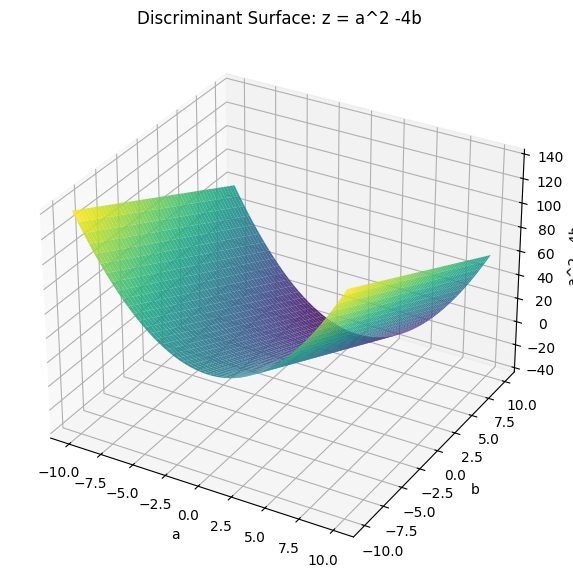

In [ ]:
np.random.seed(42)

# Generate dataset of quadratic polynomials x^2 + ax + b
N = 40000
a = np.random.uniform(-10, 10, N)
b = np.random.uniform(-10, 10, N)

# Calculate the discriminant: a^2 - 4b
discriminant = a**2 - 4*b

# Determine if the quadratic has all real roots (discriminant >= 0) or complex roots (discriminant < 0)
# 1 = all real roots, 0 = has complex roots
labels = (discriminant >= 0).astype(int)

# Count the number of polynomials with all real roots vs some complex roots
real_roots_count = np.sum(labels)
complex_roots_count = N - real_roots_count
print(f"Quadratics with all real roots: {real_roots_count} ({real_roots_count/N*100:.2f}%)")
print(f"Quadratics with complex roots: {complex_roots_count} ({complex_roots_count/N*100:.2f}%)")

# Prepare data
X = np.column_stack((a, b))
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with RBF kernel
print("\nTraining SVM with RBF kernel...")
start_time = time.time()
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model.fit(X_train_scaled, y_train)
print(f"Training completed in {time.time() - start_time:.2f} seconds")

# Evaluate
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Complex Roots', 'All Real Roots']))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize decision boundary
plt.figure(figsize=(12, 10))
plt.title('Decision Boundary: SVM with RBF Kernel')
h = 0.1
x_min, x_max = -10, 10
y_min, y_max = -10, 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(scaler.transform(mesh_points)).reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# True boundary
a_boundary = np.linspace(-10, 10, 1000)
b_boundary = a_boundary**2 / 4
plt.plot(a_boundary, b_boundary, 'r-', linewidth=2, label='True boundary: b = a²/4')

# Sample training points
sample_size = min(5000, len(X_train))
indices = np.random.choice(len(X_train), sample_size, replace=False)
plt.scatter(X_train[indices[y_train[indices] == 0], 0], X_train[indices[y_train[indices] == 0], 1],
            c='blue', marker='o', s=25, alpha=0.5, label='Complex Roots')
plt.scatter(X_train[indices[y_train[indices] == 1], 0], X_train[indices[y_train[indices] == 1], 1],
            c='red', marker='x', s=25, alpha=0.5, label='All Real Roots')

plt.xlabel('Coefficient a')
plt.ylabel('Coefficient b')
plt.legend()
plt.grid(True)
plt.show()

from mpl_toolkits.mplot3d import Axes3D

# Create grid of a and b values
a_vals = np.linspace(-10, 10, 200)
b_vals = np.linspace(-10, 10, 200)
A, B = np.meshgrid(a_vals, b_vals)
Z = A**2 - 4*B  # Discriminant function

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, Z, cmap='viridis', alpha=0.9)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('a^2 - 4b')
ax.set_title('Discriminant Surface: z = a^2 -4b')
plt.show()


In [ ]:
# Step 3: Train and evaluate models
models = {
    "Decision Tree": DecisionTreeClassifier(criterion = 'gini',random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=500, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    specificity = recall_score(y_test, y_pred, pos_label=0)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    results.append([name, acc, precision, recall, specificity, f1, auc])

# Create DataFrame for results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "Specificity", "F1 Score", "AUC"])
print(results_df)

# Save results to CSV
results_df.to_csv("model_results.csv", index=False)

            Model  Accuracy  Precision    Recall  Specificity  F1 Score  \
0   Decision Tree  0.994583   0.996499  0.996604     0.987189  0.996552   
1  Neural Network  0.998000   0.999363  0.998090     0.997671  0.998726   
2         XGBoost  0.996500   0.997772  0.997772     0.991848  0.997772   

        AUC  
0  0.991897  
1  0.999984  
2  0.999930  


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:54:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
results_df

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,AUC
0,Decision Tree,0.994583,0.996499,0.996604,0.987189,0.996552,0.991897
1,Neural Network,0.998000,0.999363,0.998090,0.997671,0.998726,0.999984
2,XGBoost,0.996500,0.997772,0.997772,0.991848,0.997772,0.999930


#Decision Tree and XGBoost

In [ ]:
warnings.filterwarnings("ignore") # many warnings appeared for the random forest model.

# Step 1: Generate dataset
np.random.seed(42)
n_samples = 40000

a = np.random.uniform(-10, 10, n_samples)
b = np.random.uniform(-10, 10, n_samples)


r = (a**2 - 4*b < 0).astype(int)  # 1 if complex roots, 0 if real roots

# Balance the dataset
ones = np.where(r == 1)[0]
zeros = np.where(r == 0)[0]
selected_zeros = np.random.choice(zeros, size=int(len(ones) * 1.5), replace=False) #results in at least 33% of r being complex
selected_indices = np.concatenate([ones, selected_zeros])
np.random.shuffle(selected_indices)

a, b, r = a[selected_indices], b[selected_indices], r[selected_indices]

# Convert to DataFrame
data = pd.DataFrame({'a': a, 'b': b, 'r': r})

# Save dataset to CSV
data.to_csv("quadratic_data.csv", index=False)

# Step 2: Split dataset
X = data[['a', 'b']]
y = data['r']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    specificity = recall_score(y_test, y_pred, pos_label=0)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    cross_val = np.mean(cross_val_score(model, X, y, cv=5))

    results.append([name, acc, precision, recall, specificity, f1, auc, cross_val])

# Create DataFrame for results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "Specificity", "F1 Score", "AUC", "CV Score"])
print(results_df)

           Model  Accuracy  Precision    Recall  Specificity  F1 Score  \
0  Decision Tree  0.995491   0.992904  0.995848     0.995253  0.994374   
1        XGBoost  0.996203   0.994083  0.996441     0.996044  0.995261   

        AUC  CV Score  
0  0.995551  0.994778  
1  0.999938  0.995775  


In [ ]:
#added features: a^2, b^2, ab
data['a_squared'] = data['a'] ** 2
data['b_squared'] = data['b'] ** 2
data['ab'] = data['a'] * data['b']

X = data[['a', 'b', 'a_squared', 'b_squared', 'ab']]
y = data['r']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    specificity = recall_score(y_test, y_pred, pos_label=0)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    cross_val = np.mean(cross_val_score(model, X, y, cv=5))

    results.append([name, acc, precision, recall, specificity, f1, auc, cross_val])

# Create DataFrame for results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "Specificity", "F1 Score", "AUC", "CV Score"])
print(results_df)

           Model  Accuracy  Precision    Recall  Specificity  F1 Score  \
0  Decision Tree  0.995491   0.994659  0.994069     0.996440  0.994364   
1        XGBoost  0.996203   0.992916  0.997628     0.995253  0.995266   

        AUC  CV Score  
0  0.995254  0.995206  
1  0.999966  0.996677  


##Neural Network, CatBoost, and LightGBM

In [ ]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

warnings.filterwarnings("ignore") # many warnings appeared for the random forest model.

# Step 1: Generate dataset
np.random.seed(42)
n_samples = 40000

a = np.random.uniform(-10, 10, n_samples)
b = np.random.uniform(-10, 10, n_samples)


r = (a**2 - 4*b < 0).astype(int)  # 1 if complex roots, 0 if real roots

# Balance the dataset
ones = np.where(r == 1)[0]
zeros = np.where(r == 0)[0]
selected_zeros = np.random.choice(zeros, size=int(len(ones) * 1.5), replace=False) #results in at least 33% of r being complex
selected_indices = np.concatenate([ones, selected_zeros])
np.random.shuffle(selected_indices)

a, b, r = a[selected_indices], b[selected_indices], r[selected_indices]

# Convert to DataFrame
data = pd.DataFrame({'a': a, 'b': b, 'r': r})

# Save dataset to CSV
data.to_csv("quadratic_data.csv", index=False)

# Step 2: Split dataset
X = data[['a', 'b']]
y = data['r']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
models = {
    "cat_model" : CatBoostClassifier(verbose=0, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=300, random_state=42),
    "lgbm_model" : LGBMClassifier(random_state=42),
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    specificity = recall_score(y_test, y_pred, pos_label=0)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    cross_val = np.mean(cross_val_score(model, X, y, cv=5))

    results.append([name, acc, precision, recall, specificity, f1, auc, cross_val])

# Create DataFrame for results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "Specificity", "F1 Score", "AUC", "CV Score"])
print(results_df)

[LightGBM] [Info] Number of positive: 6741, number of negative: 10112
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000874 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 16853, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.399988 -> initscore=-0.405515
[LightGBM] [Info] Start training from score -0.405515
[LightGBM] [Info] Number of positive: 6741, number of negative: 10112
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000570 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 16853, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.399988 -> initscore=-0.405515
[LightGBM] [Info] Start training from score -0.405515
[LightGBM] [Info] 

#Task 2: Degree 3 Polynomial

In [ ]:
#Imports
import random
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics, tree
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix



##SVM

Polynomials with all real roots: 1995 (4.99%)
Polynomials with some complex roots: 38005 (95.01%)

Training SVM with transformed features (α, β) and polynomial kernel...
Training completed in 1.64 seconds
Accuracy: 0.9763

Classification Report:
                    precision    recall  f1-score   support

Some Complex Roots       0.98      0.99      0.99     11407
    All Real Roots       0.79      0.71      0.75       593

          accuracy                           0.98     12000
         macro avg       0.89      0.85      0.87     12000
      weighted avg       0.98      0.98      0.98     12000

Confusion Matrix:
[[11296   111]
 [  173   420]]


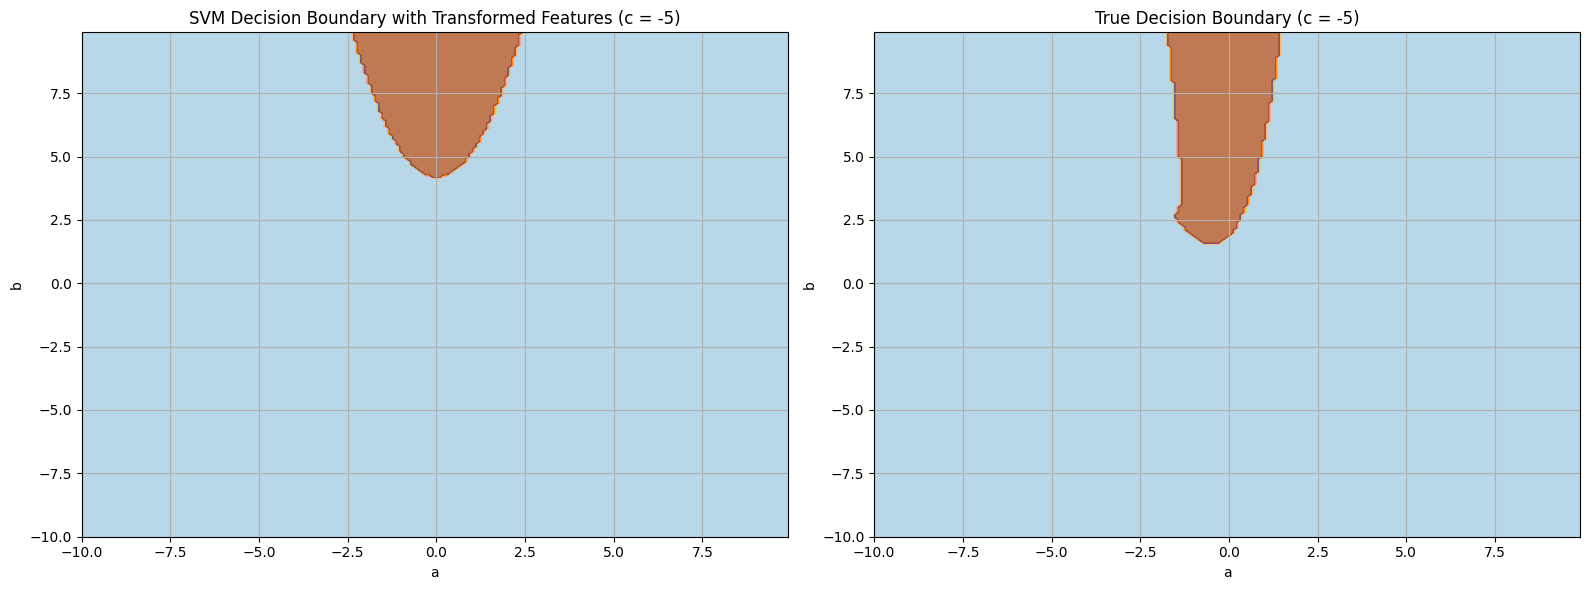

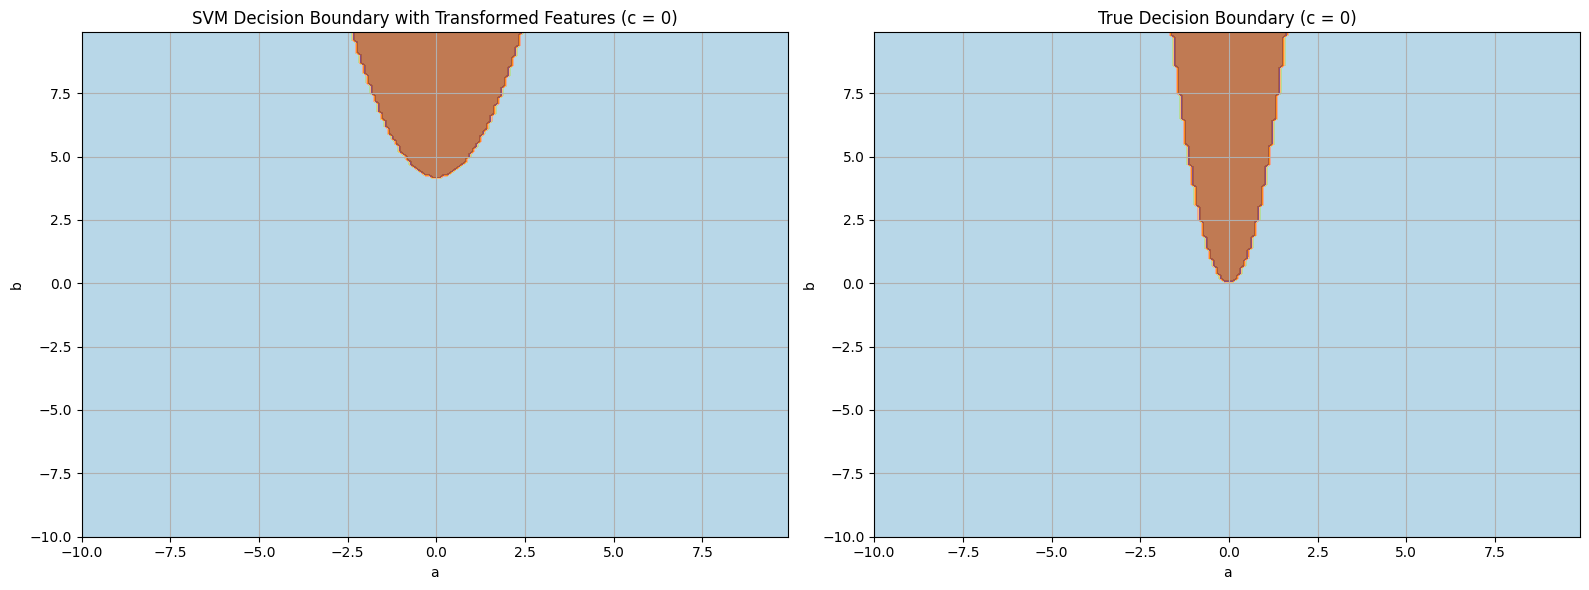

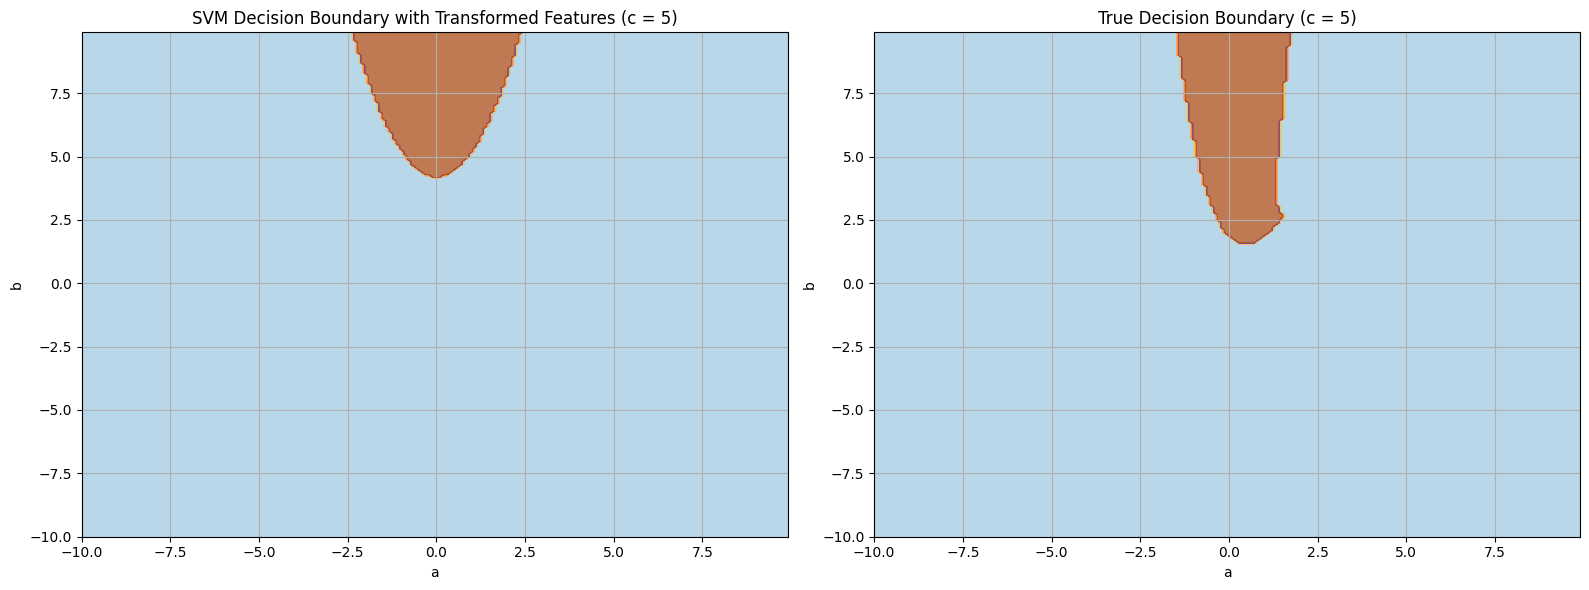

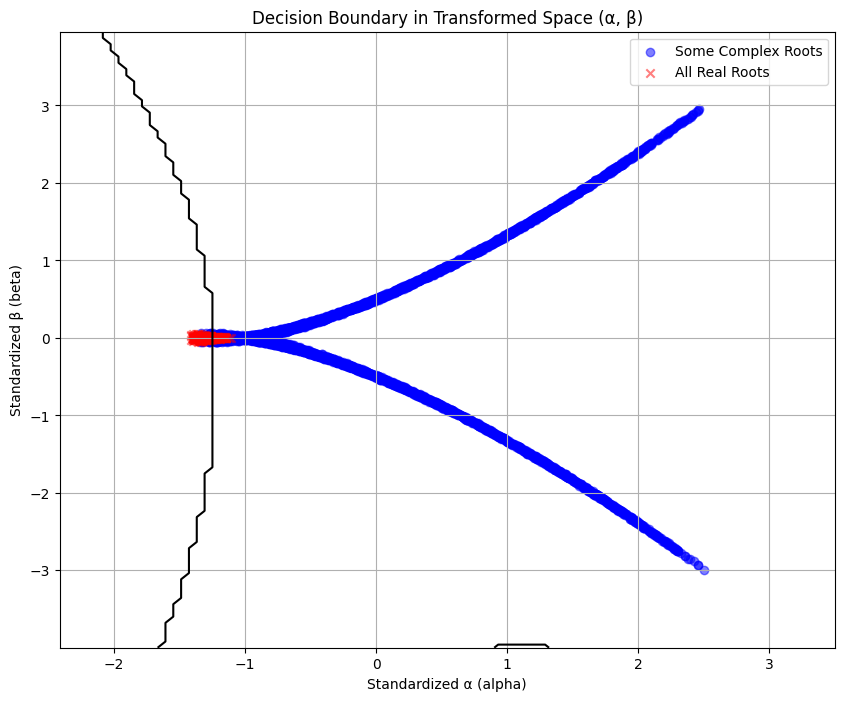

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import time

# Set random seed for reproducibility
np.random.seed(42)

# Generate dataset
N = 40000
a = np.random.uniform(-10, 10, N)
b = np.random.uniform(-10, 10, N)
c = np.random.uniform(-10, 10, N)

# Calculate alpha and beta based on the given formulas
alpha = a**2 - b
beta = 2*a**3 - 3*a*b + c

# Calculate the discriminant for a cubic polynomial
discriminant = -4*alpha**3 - beta**2

# Determine if the cubic has all real roots (discriminant >= 0) or some complex roots (discriminant < 0)
labels = (discriminant >= 0).astype(int)

# Count the number of polynomials with all real roots vs some complex roots
real_roots_count = np.sum(labels)
complex_roots_count = N - real_roots_count
print(f"Polynomials with all real roots: {real_roots_count} ({real_roots_count/N*100:.2f}%)")
print(f"Polynomials with some complex roots: {complex_roots_count} ({complex_roots_count/N*100:.2f}%)")

# Create transformed feature matrix (alpha, beta)
X_transformed = np.column_stack((alpha, beta))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, labels, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model with polynomial kernel and transformed features
print("\nTraining SVM with transformed features (α, β) and polynomial kernel...")
start_time = time.time()

# We'll use a polynomial kernel with degree=3
svm_model = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")

# Evaluate the model
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Some Complex Roots', 'All Real Roots']))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Function to visualize the decision boundary for a fixed value of c
def visualize_boundary(c_value=5):
    # Create a mesh grid
    h = 0.1
    x_min, x_max = -10, 10
    y_min, y_max = -10, 10
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Calculate alpha and beta for the mesh points
    mesh_a = xx.ravel()
    mesh_b = yy.ravel()
    mesh_alpha = mesh_a**2 - mesh_b
    mesh_beta = 2*mesh_a**3 - 3*mesh_a*mesh_b + c_value

    # Transform to feature space
    mesh_transformed = np.c_[mesh_alpha, mesh_beta]
    mesh_transformed_scaled = scaler.transform(mesh_transformed)

    # Predict using the SVM model
    Z = svm_model.predict(mesh_transformed_scaled)
    Z = Z.reshape(xx.shape)

    # Calculate the true boundary for comparison
    mesh_discriminant = -4*mesh_alpha**3 - mesh_beta**2
    true_boundary = (mesh_discriminant >= 0).astype(int)
    true_boundary = true_boundary.reshape(xx.shape)

    # Create visualization
    plt.figure(figsize=(16, 6))

    # SVM decision boundary
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.title(f'SVM Decision Boundary with Transformed Features (c = {c_value})')
    plt.xlabel('a')
    plt.ylabel('b')
    plt.grid(True)

    # True boundary
    plt.subplot(1, 2, 2)
    plt.contourf(xx, yy, true_boundary, cmap=plt.cm.Paired, alpha=0.8)
    plt.title(f'True Decision Boundary (c = {c_value})')
    plt.xlabel('a')
    plt.ylabel('b')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Visualize decision boundaries for different values of c
for c_val in [-5, 0, 5]:
    visualize_boundary(c_val)

# Visualize the transformed feature space
plt.figure(figsize=(10, 8))
plt.title('Decision Boundary in Transformed Space (α, β)')

# Sample a subset of points for clearer visualization
sample_size = 5000
indices = np.random.choice(len(X_test_scaled), sample_size, replace=False)
X_sample = X_test_scaled[indices]
y_sample = y_test[indices]

# Plot points with different colors based on class
plt.scatter(X_sample[y_sample == 0, 0], X_sample[y_sample == 0, 1],
            c='blue', marker='o', alpha=0.5, label='Some Complex Roots')
plt.scatter(X_sample[y_sample == 1, 0], X_sample[y_sample == 1, 1],
            c='red', marker='x', alpha=0.5, label='All Real Roots')

# Create a mesh grid in the transformed space
x_min, x_max = X_sample[:, 0].min() - 1, X_sample[:, 0].max() + 1
y_min, y_max = X_sample[:, 1].min() - 1, X_sample[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict using the SVM model
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contour(xx, yy, Z, colors='k', linestyles=['-'], levels=[0.5])

plt.xlabel('Standardized α (alpha)')
plt.ylabel('Standardized β (beta)')
plt.legend()
plt.grid(True)
plt.show()

##Numerical Root Finder

In [ ]:
# 3. Get actual roots and count
def count_root_types(a, b, c):
    coeffs = [1, a, b, c]
    roots = np.roots(coeffs)
    real_roots = [r for r in roots if np.isreal(r)]
    complex_roots = [r for r in roots if not np.isreal(r)]
    return len(real_roots), len(complex_roots)

# 4. Predict using your rule
def predict_by_rule(alpha, beta):
    if alpha > 0:
        if np.abs(beta) <= 2 * (alpha ** (3 / 2)):
            return "real"
        else:
            return "complex"
    else:
        return "complex"

# Define generate_samples function
def generate_samples(n):
    """Generates random samples for a, b, and c."""
    a_vals = np.random.uniform(-10, 10, n)
    b_vals = np.random.uniform(-10, 10, n)
    c_vals = np.random.uniform(-10, 10, n)
    return a_vals, b_vals, c_vals

# Define compute_alpha_beta function
def compute_alpha_beta(a_vals, b_vals, c_vals):
    """Computes alpha and beta values."""
    alpha_vals = a_vals**2 - b_vals
    beta_vals = 2*a_vals**3 - 3*a_vals*b_vals + c_vals
    return alpha_vals, beta_vals
# 5. Run comparison over all samples
def evaluate_rule_vs_roots(n=1000):
    a_vals, b_vals, c_vals = generate_samples(n)
    alpha_vals, beta_vals = compute_alpha_beta(a_vals, b_vals, c_vals)

    correct = 0
    for i in range(n):
        a, b, c = a_vals[i], b_vals[i], c_vals[i]
        alpha, beta = alpha_vals[i], beta_vals[i]

        rule_prediction = predict_by_rule(alpha, beta)

        num_real, num_complex = count_root_types(a, b, c)
        actual = "real" if num_real == 3 else "complex"

        if rule_prediction == actual:
            correct += 1

    accuracy = correct / n
    print(f"Rule matched actual root behavior in {correct}/{n} cases → Accuracy = {accuracy:.4f}")

evaluate_rule_vs_roots(n=10000)

Rule matched actual root behavior in 7847/10000 cases → Accuracy = 0.7847


##Tree models

In [ ]:
import warnings
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

warnings.filterwarnings("ignore")
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "cat_model" : CatBoostClassifier(verbose=0, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=300, random_state=42),
    "lgbm_model" : LGBMClassifier(random_state=42),
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    specificity = recall_score(y_test, y_pred, pos_label=0)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    #cross_val = np.mean(cross_val_score(model, X, y, cv=5))

    results.append([name, acc, precision, recall, specificity, f1, auc])

# Create DataFrame for results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "Specificity", "F1 Score", "AUC"])
print(results_df)

[LightGBM] [Info] Number of positive: 1402, number of negative: 26598
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 28000, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.050071 -> initscore=-2.942936
[LightGBM] [Info] Start training from score -2.942936
            Model  Accuracy  Precision    Recall  Specificity  F1 Score  \
0   Decision Tree  0.993583   0.932886  0.937605     0.996493  0.935240   
1         XGBoost  0.995417   0.949833  0.957841     0.997370  0.953820   
2       cat_model  0.995833   0.948760  0.967960     0.997282  0.958264   
3  Neural Network  0.997000   0.974446  0.964587     0.998685  0.969492   
4      lgbm_model  0.995417   0.945364  0.962901     0.997107  0.954052   

        AUC  
0  0.967049  
1  0.999715  
2  0.999751  
3 

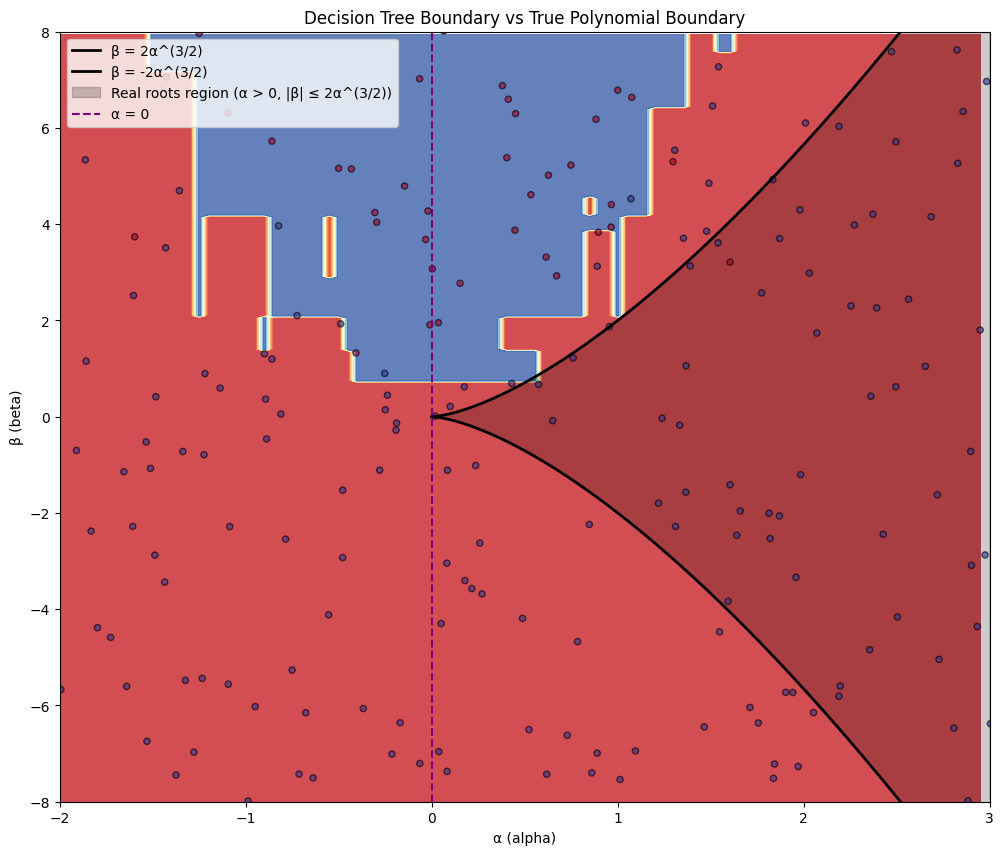

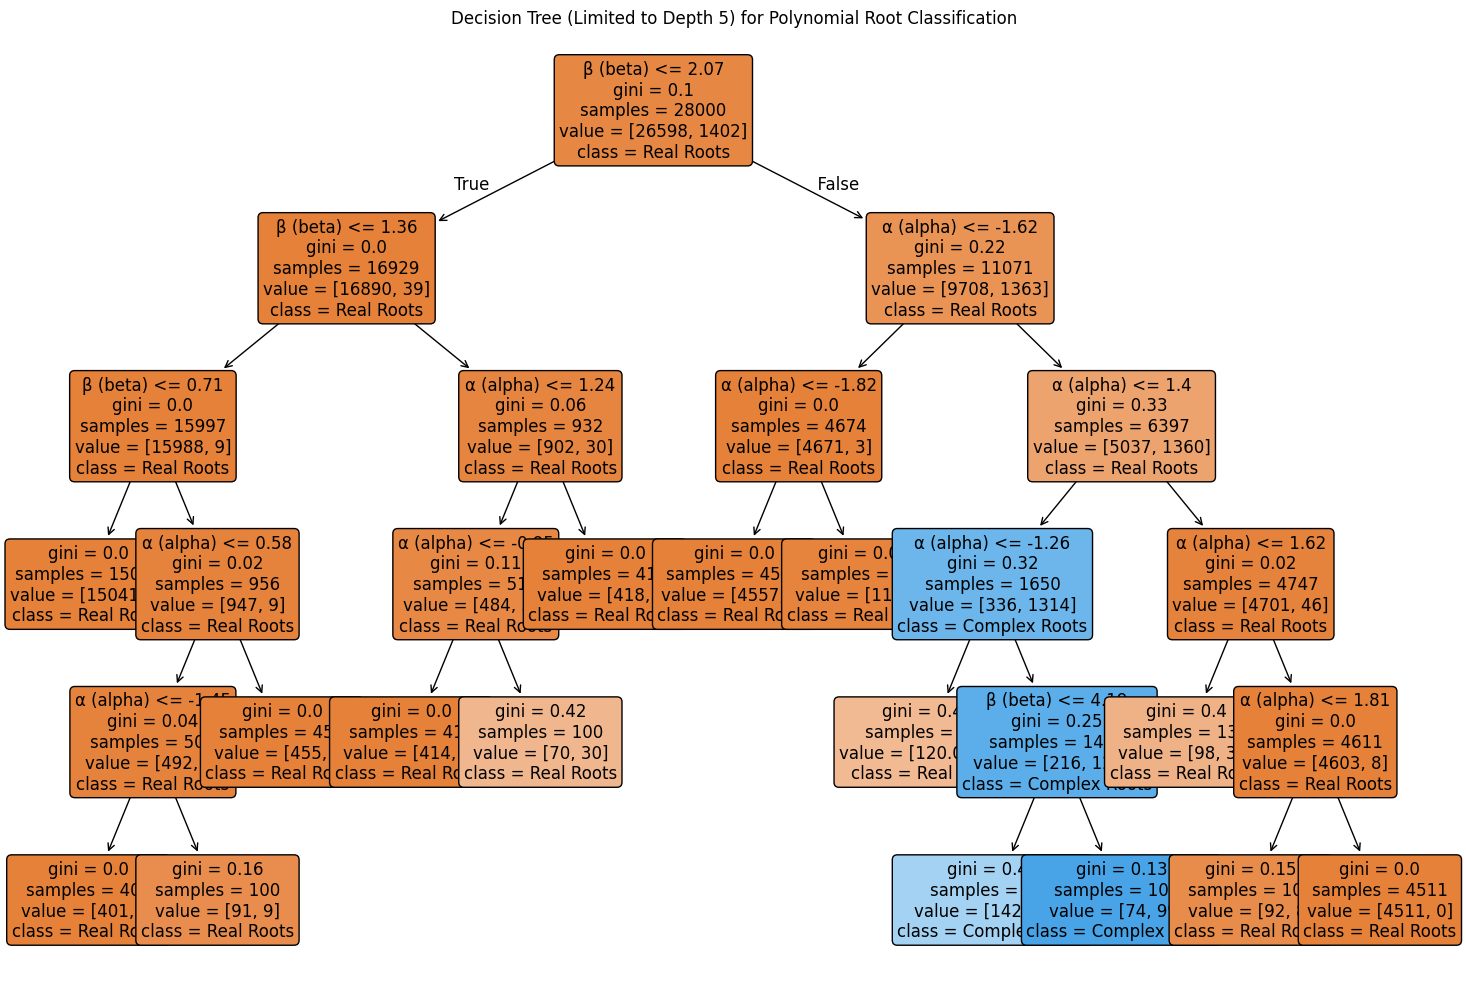

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_model = models["Decision Tree"]

def plot_decision_boundaries():
    # Create a mesh grid for visualization
    x_min, x_max = -2, 3  # alpha range
    y_min, y_max = -8, 8  # beta range
    h = 0.05  # step size in mesh

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Calculate alpha_cubed and beta_squared for the mesh points
    alpha_cubed_mesh = xx.ravel() ** 3
    beta_squared_mesh = yy.ravel() ** 2

    # Include alpha_cubed and beta_squared in mesh_points
    mesh_points = np.c_[xx.ravel(), yy.ravel(), alpha_cubed_mesh, beta_squared_mesh] #Added alpha_cubed_mesh and beta_squared_mesh

    # Get predictions from decision tree
    Z = dt_model.predict(mesh_points[:, :dt_model.n_features_in_]) #Select the appropriate number of features
    Z = Z.reshape(xx.shape)
    # Plot the decision boundary
    plt.figure(figsize=(12, 10))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

    # Plot the true polynomial boundary
    alpha_values = np.linspace(0, x_max, 1000)  # Only plot for α > 0
    upper_curve = 2 * alpha_values**(3/2)
    lower_curve = -2 * alpha_values**(3/2)

    plt.plot(alpha_values, upper_curve, 'k-', linewidth=2, label='β = 2α^(3/2)')
    plt.plot(alpha_values, lower_curve, 'k-', linewidth=2, label='β = -2α^(3/2)')
    plt.fill_between(alpha_values, lower_curve, upper_curve, color='black', alpha=0.2,
                  label='Real roots region (α > 0, |β| ≤ 2α^(3/2))')

    # Add α=0 line
    plt.axvline(x=0, color='purple', linestyle='--', label='α = 0')

    # Plot a subset of the training data points for reference
    sample_idx = np.random.choice(len(X_train), size=1000, replace=False)
    plt.scatter(X_train[sample_idx, 0], X_train[sample_idx, 1],
                c=y_train[sample_idx], cmap=plt.cm.RdYlBu_r,
                edgecolors='k', alpha=0.6, s=20)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('α (alpha)')
    plt.ylabel('β (beta)')
    plt.title('Decision Tree Boundary vs True Polynomial Boundary')
    plt.legend(loc="upper left")
    plt.savefig('decision_tree_boundary.png', dpi=300)
    plt.show()

# Plot the decision boundaries
plot_decision_boundaries()


# Create a smaller tree for better visualization
small_dt = DecisionTreeClassifier(random_state=42, min_samples_leaf=100, min_samples_split=300, max_depth=5)
small_dt.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(small_dt,
          filled=True,
          rounded=True,
          feature_names=['α (alpha)', 'β (beta)'],
          class_names=['Real Roots', 'Complex Roots'],
          proportion=False,
          precision=2,
          fontsize=12)

plt.title('Decision Tree (Limited to Depth 5) for Polynomial Root Classification', fontsize=12)
plt.tight_layout()
plt.savefig('simplified_decision_tree.png', dpi=300, bbox_inches='tight')
plt.show()